In [1]:
%matplotlib inline

In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib.pylab as plt
import imp
import csv
import pandas as pd
from io import StringIO

In [3]:
Refyear = 1992
Refyearind = Refyear-1900
Finyear = 2017
Finyearind = Finyear-1900
EnsembleNumber = 20000
YearNumber = 200

1992


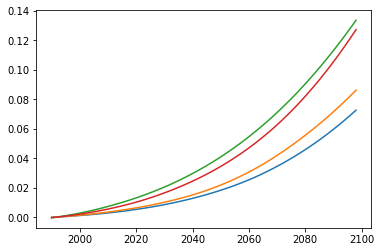

In [4]:
# Read data
# CISM_NCA

fname="../ComputeProjection4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_CISM_NCA_RCP85.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_CISM_NCA_R0_RCP85 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_CISM_NCA_R1_RCP85 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_CISM_NCA_R2_RCP85 = ncf.variables["Ross"][:]
SL_wTd_nos_base_CISM_NCA_R3_RCP85 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_CISM_NCA_R4_RCP85 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_CISM_NCA_R5_RCP85 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_CISM_NCA_SU_RCP85 = SL_wTd_nos_base_CISM_NCA_R1_RCP85+SL_wTd_nos_base_CISM_NCA_R2_RCP85+SL_wTd_nos_base_CISM_NCA_R3_RCP85+SL_wTd_nos_base_CISM_NCA_R4_RCP85+SL_wTd_nos_base_CISM_NCA_R5_RCP85
ncf.close()

print(Time[Refyearind])
# Normalizing
for i in range(0,EnsembleNumber):
    SL_wTd_nos_base_CISM_NCA_SU_RCP85_offset = SL_wTd_nos_base_CISM_NCA_SU_RCP85[i,Refyearind]
    SL_wTd_nos_base_CISM_NCA_R0_RCP85_offset = SL_wTd_nos_base_CISM_NCA_R0_RCP85[i,Refyearind]
    SL_wTd_nos_base_CISM_NCA_R1_RCP85_offset = SL_wTd_nos_base_CISM_NCA_R1_RCP85[i,Refyearind]
    SL_wTd_nos_base_CISM_NCA_R2_RCP85_offset = SL_wTd_nos_base_CISM_NCA_R2_RCP85[i,Refyearind]
    SL_wTd_nos_base_CISM_NCA_R3_RCP85_offset = SL_wTd_nos_base_CISM_NCA_R3_RCP85[i,Refyearind]
    SL_wTd_nos_base_CISM_NCA_R4_RCP85_offset = SL_wTd_nos_base_CISM_NCA_R4_RCP85[i,Refyearind]
    SL_wTd_nos_base_CISM_NCA_R5_RCP85_offset = SL_wTd_nos_base_CISM_NCA_R5_RCP85[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_CISM_NCA_SU_RCP85[i,yr] = SL_wTd_nos_base_CISM_NCA_SU_RCP85[i,yr]-SL_wTd_nos_base_CISM_NCA_SU_RCP85_offset
        SL_wTd_nos_base_CISM_NCA_R0_RCP85[i,yr] = SL_wTd_nos_base_CISM_NCA_R0_RCP85[i,yr]-SL_wTd_nos_base_CISM_NCA_R0_RCP85_offset
        SL_wTd_nos_base_CISM_NCA_R1_RCP85[i,yr] = SL_wTd_nos_base_CISM_NCA_R1_RCP85[i,yr]-SL_wTd_nos_base_CISM_NCA_R1_RCP85_offset
        SL_wTd_nos_base_CISM_NCA_R2_RCP85[i,yr] = SL_wTd_nos_base_CISM_NCA_R2_RCP85[i,yr]-SL_wTd_nos_base_CISM_NCA_R2_RCP85_offset
        SL_wTd_nos_base_CISM_NCA_R3_RCP85[i,yr] = SL_wTd_nos_base_CISM_NCA_R3_RCP85[i,yr]-SL_wTd_nos_base_CISM_NCA_R3_RCP85_offset
        SL_wTd_nos_base_CISM_NCA_R4_RCP85[i,yr] = SL_wTd_nos_base_CISM_NCA_R4_RCP85[i,yr]-SL_wTd_nos_base_CISM_NCA_R4_RCP85_offset
        SL_wTd_nos_base_CISM_NCA_R5_RCP85[i,yr] = SL_wTd_nos_base_CISM_NCA_R5_RCP85[i,yr]-SL_wTd_nos_base_CISM_NCA_R5_RCP85_offset
plt.plot(Time[90:199],SL_wTd_nos_base_CISM_NCA_SU_RCP85[30,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_CISM_NCA_SU_RCP85[430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_CISM_NCA_SU_RCP85[3430,90:199])
plt.plot(Time[90:199],SL_wTd_nos_base_CISM_NCA_SU_RCP85[12530,90:199])



In [5]:
# compute cumulative probability distributions
cdfnum = 1000
cdfstep = int(len(SL_wTd_nos_base_CISM_NCA_SU_RCP85[:,0])/cdfnum)
print(cdfstep)

SL_wTd_nos_base_CISM_NCA_R0_RCP85_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_CISM_NCA_SU_RCP85[1,:])):
    # merge sl with weights
    sortind = np.argsort(SL_wTd_nos_base_CISM_NCA_SU_RCP85[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_CISM_NCA_SU_RCP85[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_CISM_NCA_R0_RCP85_cdf=np.vstack([SL_wTd_nos_base_CISM_NCA_R0_RCP85_cdf, slcdf])

SL_wTd_nos_base_CISM_NCA_R1_RCP85_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_CISM_NCA_R1_RCP85[1,:])):
    # merge sl with weights
    sortind = np.argsort(SL_wTd_nos_base_CISM_NCA_R1_RCP85[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_CISM_NCA_R1_RCP85[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_CISM_NCA_R1_RCP85_cdf=np.vstack([SL_wTd_nos_base_CISM_NCA_R1_RCP85_cdf, slcdf])

SL_wTd_nos_base_CISM_NCA_R2_RCP85_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_CISM_NCA_R2_RCP85[1,:])):
    # merge sl with weights
    sortind = np.argsort(SL_wTd_nos_base_CISM_NCA_R2_RCP85[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_CISM_NCA_R2_RCP85[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_CISM_NCA_R2_RCP85_cdf=np.vstack([SL_wTd_nos_base_CISM_NCA_R2_RCP85_cdf, slcdf])

SL_wTd_nos_base_CISM_NCA_R3_RCP85_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_CISM_NCA_R3_RCP85[1,:])):
    # merge sl with weights
    sortind = np.argsort(SL_wTd_nos_base_CISM_NCA_R3_RCP85[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_CISM_NCA_R3_RCP85[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_CISM_NCA_R3_RCP85_cdf=np.vstack([SL_wTd_nos_base_CISM_NCA_R3_RCP85_cdf, slcdf])

SL_wTd_nos_base_CISM_NCA_R4_RCP85_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_CISM_NCA_R4_RCP85[1,:])):
    # merge sl with weights
    sortind = np.argsort(SL_wTd_nos_base_CISM_NCA_R4_RCP85[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_CISM_NCA_R4_RCP85[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_CISM_NCA_R4_RCP85_cdf=np.vstack([SL_wTd_nos_base_CISM_NCA_R4_RCP85_cdf, slcdf])

SL_wTd_nos_base_CISM_NCA_R5_RCP85_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_CISM_NCA_R5_RCP85[1,:])):
    # merge sl with weights
    sortind = np.argsort(SL_wTd_nos_base_CISM_NCA_R5_RCP85[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_CISM_NCA_R5_RCP85[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_CISM_NCA_R5_RCP85_cdf=np.vstack([SL_wTd_nos_base_CISM_NCA_R5_RCP85_cdf, slcdf])

Percentile = np.arange(0,float((cdfnum+1)/cdfnum),float(1/cdfnum))


# write cdfs
ncfile = nc.Dataset('Cdfs/SL_hindcast_wTd_nos_base_CISM_NCA_RCP85_cdf_simple.nc','w', format='NETCDF4')
ncfile.createDimension('Time', None)
ncfile.createDimension('Percentile', None)

SL_wTd_weighted_base_R0 = ncfile.createVariable('Antarctica', 'f4', ('Time','Percentile'))
SL_wTd_weighted_base_R1 = ncfile.createVariable('EAIS', 'f4', ('Time','Percentile'))
SL_wTd_weighted_base_R2 = ncfile.createVariable('Ross', 'f4', ('Time','Percentile'))
SL_wTd_weighted_base_R3 = ncfile.createVariable('Amundsen', 'f4', ('Time','Percentile'))
SL_wTd_weighted_base_R4 = ncfile.createVariable('Weddell', 'f4', ('Time','Percentile'))
SL_wTd_weighted_base_R5 = ncfile.createVariable('Peninsula', 'f4', ('Time','Percentile'))
p = ncfile.createVariable('Percentile', 'f4', 'Percentile')
t = ncfile.createVariable('Time', 'f4', 'Time')

t[:] = Time
t.units = 'years'
SL_wTd_weighted_base_R0[:,:] = SL_wTd_nos_base_CISM_NCA_R0_RCP85_cdf
SL_wTd_weighted_base_R1[:,:] = SL_wTd_nos_base_CISM_NCA_R1_RCP85_cdf
SL_wTd_weighted_base_R2[:,:] = SL_wTd_nos_base_CISM_NCA_R2_RCP85_cdf
SL_wTd_weighted_base_R3[:,:] = SL_wTd_nos_base_CISM_NCA_R3_RCP85_cdf
SL_wTd_weighted_base_R4[:,:] = SL_wTd_nos_base_CISM_NCA_R4_RCP85_cdf
SL_wTd_weighted_base_R5[:,:] = SL_wTd_nos_base_CISM_NCA_R5_RCP85_cdf
p[:] = Percentile

SL_wTd_weighted_base_R0.units = 'meter'
SL_wTd_weighted_base_R1.units = 'meter'
SL_wTd_weighted_base_R2.units = 'meter'
SL_wTd_weighted_base_R3.units = 'meter'
SL_wTd_weighted_base_R4.units = 'meter'
SL_wTd_weighted_base_R5.units = 'meter'

p.units = 'percent'

ncfile.close()


20


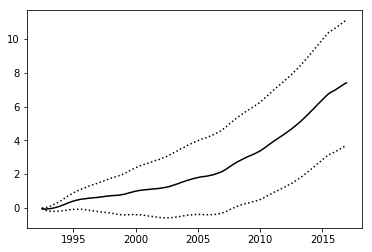

In [6]:
fname = "../ObservationalData/imbie_dataset-2018_06_08.dat" # File to read
df = pd.read_csv(fname,sep='\t',index_col=-1,header=None)
ObsData = np.array(df.values)
ObsTime = ObsData[:,0]
ObsSL = ObsData[:,3]
ObsUncertainty = ObsData[:,4]
#print(ObsData[:,0])
plt.plot(ObsTime,ObsSL,'k')
plt.plot(ObsTime,ObsSL-ObsUncertainty,':k')
plt.plot(ObsTime,ObsSL+ObsUncertainty,':k')

#ObsDSL = ObsData[:,4]

200
200


(0.0, 16.0)

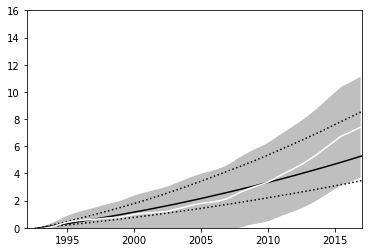

In [7]:
xmin = 1992
xmax = 2017
ymin = 0.0
ymax = 0.016*1000
xlimit = [xmin, xmax]
ylimit = [ymin, ymax]
AspectRatio = 1.0*((xmax-xmin)/(ymax-ymin))

fp, ax = plt.subplots(1, 1)
print(len(Time))
print(len(SL_wTd_nos_base_CISM_NCA_R0_RCP85_cdf[0:-1,500]))

SL_wTd_nos_base_CISM_NCA_SU_RCP26_01pc = SL_wTd_nos_base_CISM_NCA_R0_RCP85_cdf[0:-1,10]
SL_wTd_nos_base_CISM_NCA_SU_RCP26_05pc = SL_wTd_nos_base_CISM_NCA_R0_RCP85_cdf[0:-1,50]
SL_wTd_nos_base_CISM_NCA_SU_RCP26_17pc = SL_wTd_nos_base_CISM_NCA_R0_RCP85_cdf[0:-1,166]
SL_wTd_nos_base_CISM_NCA_SU_RCP26_50pc = SL_wTd_nos_base_CISM_NCA_R0_RCP85_cdf[0:-1,500]
SL_wTd_nos_base_CISM_NCA_SU_RCP26_83pc = SL_wTd_nos_base_CISM_NCA_R0_RCP85_cdf[0:-1,833]
SL_wTd_nos_base_CISM_NCA_SU_RCP26_95pc = SL_wTd_nos_base_CISM_NCA_R0_RCP85_cdf[0:-1,950]
SL_wTd_nos_base_CISM_NCA_SU_RCP26_99pc = SL_wTd_nos_base_CISM_NCA_R0_RCP85_cdf[0:-1,990]

ax.plot(Time, SL_wTd_nos_base_CISM_NCA_SU_RCP26_17pc*1000,':k')
ax.plot(Time,SL_wTd_nos_base_CISM_NCA_SU_RCP26_83pc*1000,':k')
ax.plot(Time, SL_wTd_nos_base_CISM_NCA_SU_RCP26_50pc*1000, '#000000')

ax.fill_between(ObsTime, ObsSL-ObsUncertainty, ObsSL+ObsUncertainty,facecolor='#000000',alpha=0.25)
ax.plot(ObsTime,ObsSL, '#ffffff')

ax.set_xlim(xlimit)
ax.set_ylim(ylimit)


In [8]:
print(SL_wTd_nos_base_CISM_NCA_R0_RCP85_cdf[-1,990])

0.3721270263195038
